In [1]:
from cheaper.params import CheapERParams
from cheaper.pipeline import cheaper_train
from cheaper.pipeline import get_datasets
from transformers import pipeline
from transformers import AutoModel, AutoTokenizer, AutoModelForMaskedLM, AutoModelForSequenceClassification

2023-03-17 10:40:28.239767: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# get datasets
datasets = get_datasets()
beers_dataset = datasets[5]

In [3]:
# cheapER parameters' settings
params = CheapERParams(fast=True)
params.slicing = [0.05]
params.epochs = 5

CheapER: training on dataset "beers"
CheapER: using params "sigma=100,kappa=10,epsilon=0,adaptive_ft=True,num_runs=1,normalize=True,sim_length=5,warmup=True,epochs=5,lr=1e-05,attribute_shuffle=False,identity=False,symmetry=False,models=['distilbert-base-uncased'],slicing=[0.05],compare=False,generated_only=True,approx=perceptron,balance=[0.5, 0.5],adjust_ds_size=False,batch_size=16,silent=True,deeper_trick=True,consistency=True,sim_edges=True,simple_slicing=True,use_model=noisy-student,teaching_iterations=3,lr_multiplier=3,data_noise=True,temperature=asc,discard_old_data=True,use_scores=False,threshold=0,weight_decay=0.01,label_smoothing=0.1,hf_training=True,seq_length=0,best_model=eval_f1,mask_token=[MASK],model_noise=True,mcd_samples=1, sample_tag=False"
Generating dataset
Parsing original dataset
min coseno match:0.30316953129541624
13
13
13
match_tuple: 13
no match_tuple: 13
No_match_with_cos_too_small: 0


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'pre_classifier.weight', 'classi

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


***** Running training *****
  Num examples = 6610
  Num Epochs = 5
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 4135
  Number of trainable parameters = 66985530
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


wandb: Currently logged in as: tteofili (tteofili-nlp). Use `wandb login --relogin` to force relogin


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


Saving model checkpoint to ./models/beers/checkpoint-500
Configuration saved in ./models/beers/checkpoint-500/config.json
Model weights saved in ./models/beers/checkpoint-500/pytorch_model.bin
Deleting older checkpoint [models/beers/checkpoint-2] due to args.save_total_limit
Saving model checkpoint to ./models/beers/checkpoint-1000
Configuration saved in ./models/beers/checkpoint-1000/config.json
Model weights saved in ./models/beers/checkpoint-1000/pytorch_model.bin
Deleting older checkpoint [models/beers/checkpoint-22] due to args.save_total_limit
Saving model checkpoint to ./models/beers/checkpoint-1500
Configuration saved in ./models/beers/checkpoint-1500/config.json
Model weights saved in ./models/beers/checkpoint-1500/pytorch_model.bin
Deleting older checkpoint [models/beers/checkpoint-500] due to args.save_total_limit
Saving model checkpoint to ./models/beers/checkpoint-2000
Configuration saved in ./models/beers/checkpoint-2000/config.json
Model weights saved in ./models/beers/c

------------- Teacher Training distilbert-base-uncased ------------------
Training with 26 record pairs (5.0% GT)
loading adaptive_ft model from models/beers/mlm-distilbert-base-uncased


loading configuration file models/beers/mlm-distilbert-base-uncased/config.json
Model config DistilBertConfig {
  "_name_or_path": "models/beers/mlm-distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.24.0",
  "vocab_size": 30522
}

loading weights file models/beers/mlm-distilbert-base-uncased/pytorch_model.bin
Some weights of the model checkpoint at models/beers/mlm-distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Using custom data configuration default-cb5a62c7e0f5cce7


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /Users/tommasoteofili/.cache/huggingface/datasets/csv/default-cb5a62c7e0f5cce7/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.
Using custom data configuration default-b40f2ac60e48f19d


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /Users/tommasoteofili/.cache/huggingface/datasets/csv/default-b40f2ac60e48f19d/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.


  0%|          | 0/26 [00:00<?, ?ex/s]

  0%|          | 0/91 [00:00<?, ?ex/s]

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 26
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 10
  Number of trainable parameters = 66955010
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"


Epoch,Training Loss,Validation Loss


***** Running Evaluation *****
  Num examples = 91
  Batch size = 16
Saving model checkpoint to ./models/beers/checkpoint-2
Configuration saved in ./models/beers/checkpoint-2/config.json
Model weights saved in ./models/beers/checkpoint-2/pytorch_model.bin
tokenizer config file saved in ./models/beers/checkpoint-2/tokenizer_config.json
Special tokens file saved in ./models/beers/checkpoint-2/special_tokens_map.json
Deleting older checkpoint [models/beers/checkpoint-3500] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 91
  Batch size = 16
Saving model checkpoint to ./models/beers/checkpoint-4
Configuration saved in ./models/beers/checkpoint-4/config.json
Model weights saved in ./models/beers/checkpoint-4/pytorch_model.bin
tokenizer config file saved in ./models/beers/checkpoint-4/tokenizer_config.json
Special tokens file saved in ./models/beers/checkpoint-4/special_tokens_map.json
Deleting older checkpoint [models/beers/checkpoint-4000] due to args.save_tota

Generating dataset
Parsing original dataset
min coseno match:0.2773500981126146
219
40
219
match_tuple: 40
no match_tuple: 219
No_match_with_cos_too_small: 9
match number: 6 no match number: 6


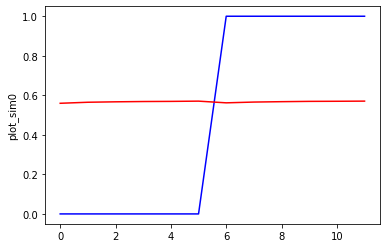

min_sim_Match 0.5619623max_sim_noMatch 0.57053113
!max_sim 0.5705311298370361
!min_sim 0.5
--------------- Generating datasets --------------
min_cos_sim 0.30316953129541624
creating data with theta_min:0.5, theta_max:0.5705311298370361
4345
3000
4345
3000
4345
LSH blocking started
903 pairs found
999 pairs found
1254 pairs found
1280 pairs found
LSH blocking done


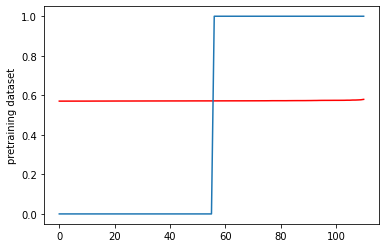

111 positive pairs found via LSH blocking and high similarity check
0 negative pairs found via LSH blocking and low similarity check
max pair visit: 1000
dizionari
listL_match[0]
0


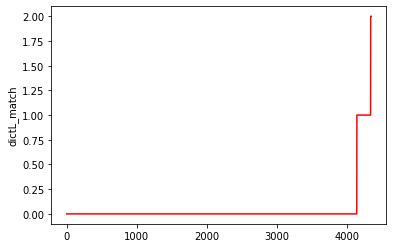

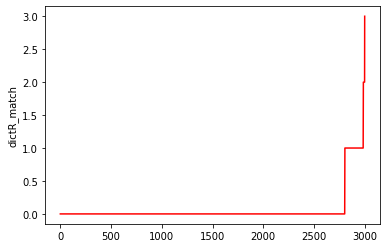

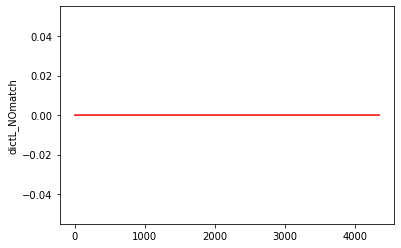

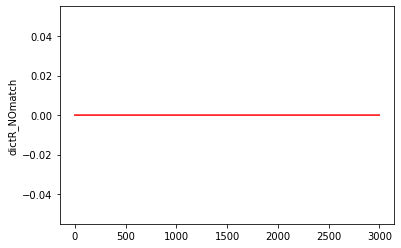

create candidates set
207 matches, 0 non-matches, 10 consistency pairs
dizionari occorrenze degli attributi del dataset di pt


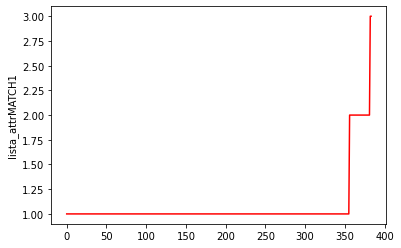

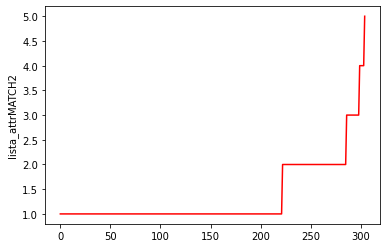

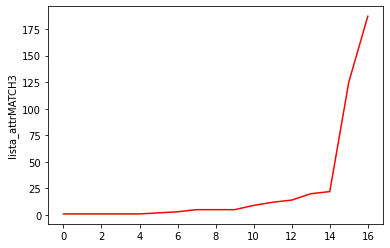

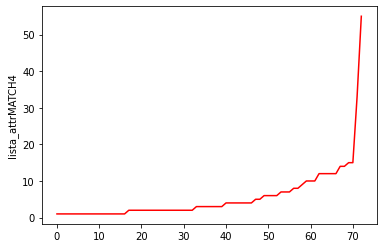

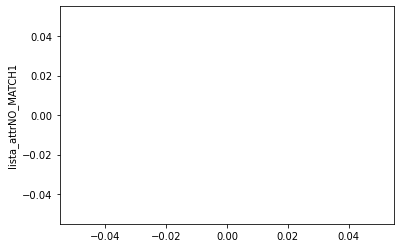

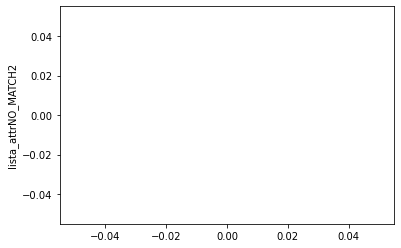

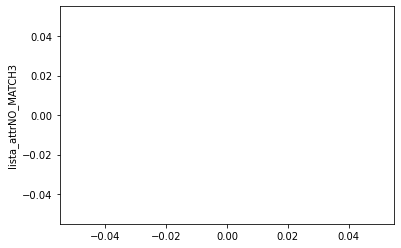

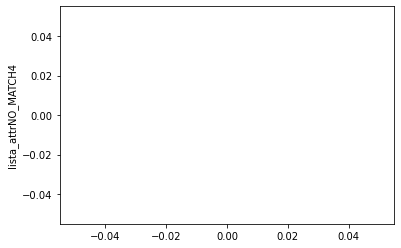

tot_pt: 100
len(random_tuples0) 207
len(result_list_noMatch) 0
len(result_list_match) 207


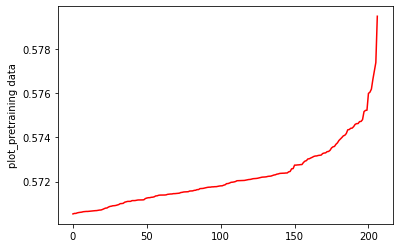

num of non-matches 0
num of matches 206
adding 10 consistency pairs


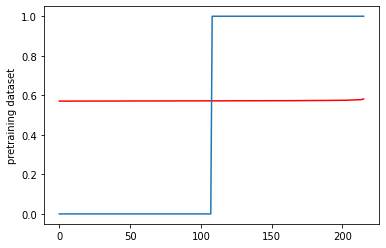

--------------- data augmentation creating dataset --------------
using threshold=0.5705311298370361 to approximate label
discarded 0 elements


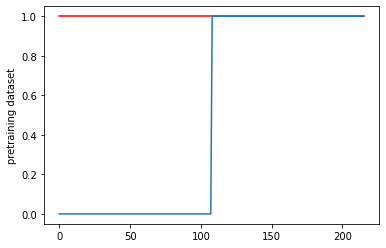

Previous generated dataset size: 0
New generated dataset size: 216


loading configuration file config.json from cache at /Users/tommasoteofili/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.24.0",
  "vocab_size": 30522
}

loading file vocab.txt from cache at /Users/tommasoteofili/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/vocab.txt
loading file tokenizer.json from cache at /Users/tommasoteofili/.cache/huggin

------------- Student Training distilbert-base-uncased -----------------
Training with 242 record pairs (216 generated, 26 GT)
loading adaptive_ft model from models/beers/mlm-distilbert-base-uncased


loading configuration file models/beers/mlm-distilbert-base-uncased/config.json
Model config DistilBertConfig {
  "_name_or_path": "models/beers/mlm-distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.24.0",
  "vocab_size": 30522
}

loading weights file models/beers/mlm-distilbert-base-uncased/pytorch_model.bin
Some weights of the model checkpoint at models/beers/mlm-distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer

Using custom data configuration default-2035360ee7d12654


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /Users/tommasoteofili/.cache/huggingface/datasets/csv/default-2035360ee7d12654/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.
Using custom data configuration default-b13c2a443a3bec68


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /Users/tommasoteofili/.cache/huggingface/datasets/csv/default-b13c2a443a3bec68/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.


  0%|          | 0/242 [00:00<?, ?ex/s]

  0%|          | 0/91 [00:00<?, ?ex/s]

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 242
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 80
  Number of trainable parameters = 66955010
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss


***** Running Evaluation *****
  Num examples = 91
  Batch size = 16
Saving model checkpoint to ./models/beers/checkpoint-16
Configuration saved in ./models/beers/checkpoint-16/config.json
Model weights saved in ./models/beers/checkpoint-16/pytorch_model.bin
tokenizer config file saved in ./models/beers/checkpoint-16/tokenizer_config.json
Special tokens file saved in ./models/beers/checkpoint-16/special_tokens_map.json
Deleting older checkpoint [models/beers/checkpoint-2] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 91
  Batch size = 16
Saving model checkpoint to ./models/beers/checkpoint-32
Configuration saved in ./models/beers/checkpoint-32/config.json
Model weights saved in ./models/beers/checkpoint-32/pytorch_model.bin
tokenizer config file saved in ./models/beers/checkpoint-32/tokenizer_config.json
Special tokens file saved in ./models/beers/checkpoint-32/special_tokens_map.json
Deleting older checkpoint [models/beers/checkpoint-10] due to args.save

Configuration saved in models/beers/best/models/beers/best/config.json
Model weights saved in models/beers/best/models/beers/best/pytorch_model.bin
tokenizer config file saved in models/beers/best/models/beers/best/tokenizer_config.json
Special tokens file saved in models/beers/best/models/beers/best/special_tokens_map.json


<bound method DataFrame.to_string of                 model_type    train   cut    pM   rM   f1M  pNM  rNM  f1NM
0  distilbert-base-uncased  teacher  0.05  0.15  1.0  0.27  0.0  0.0   0.0
1  distilbert-base-uncased  student  0.05  0.15  1.0  0.27  0.0  0.0   0.0>
Generating dataset
Parsing original dataset
min coseno match:0.2773500981126146
219
40
219
match_tuple: 40
no match_tuple: 219
No_match_with_cos_too_small: 9
match number: 6 no match number: 6


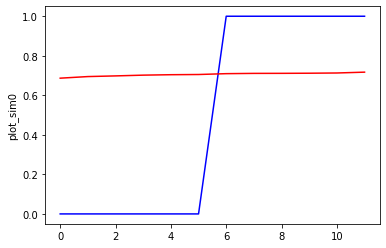

min_sim_Match 0.70953244max_sim_noMatch 0.7052644
!max_sim 0.7095324397087097
!min_sim 0.5
--------------- Generating datasets --------------
min_cos_sim 0.30316953129541624
creating data with theta_min:0.5, theta_max:0.7095324397087097
4345
3000
4345
3000
4345
LSH blocking started
903 pairs found
999 pairs found
1254 pairs found
1280 pairs found
LSH blocking done


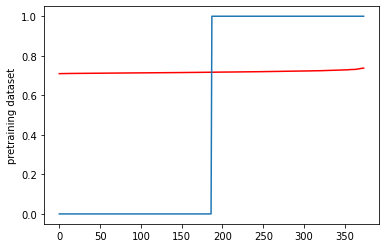

374 positive pairs found via LSH blocking and high similarity check
0 negative pairs found via LSH blocking and low similarity check
max pair visit: 1000
dizionari
listL_match[0]
0


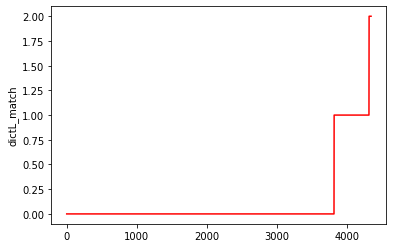

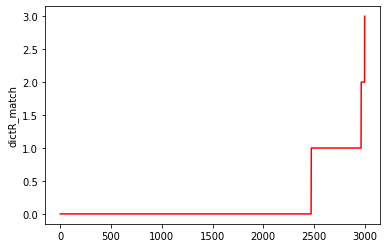

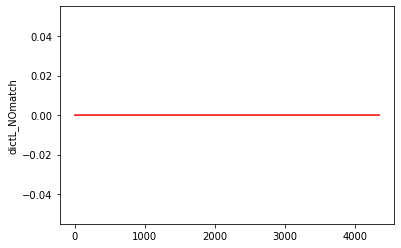

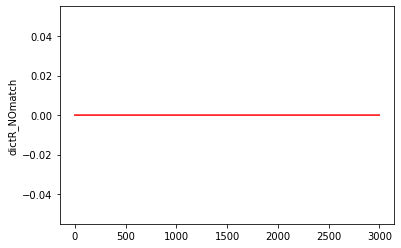

create candidates set
557 matches, 0 non-matches, 10 consistency pairs
dizionari occorrenze degli attributi del dataset di pt


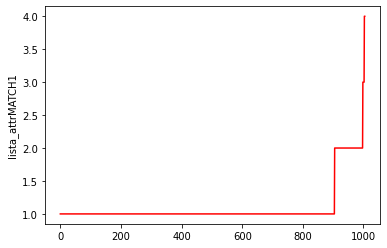

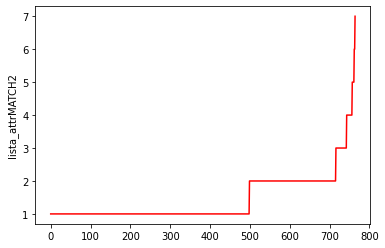

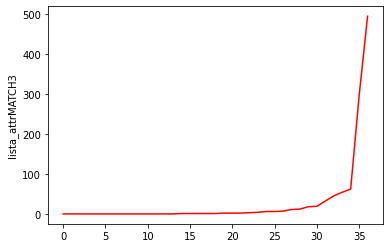

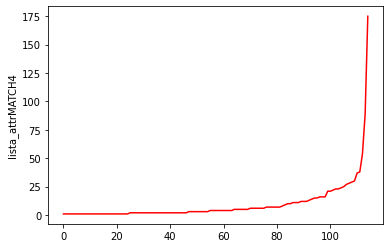

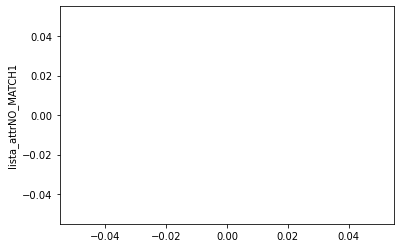

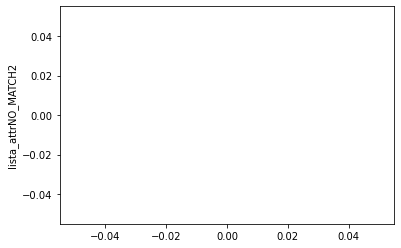

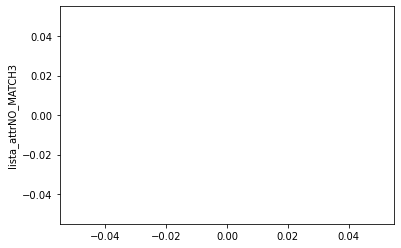

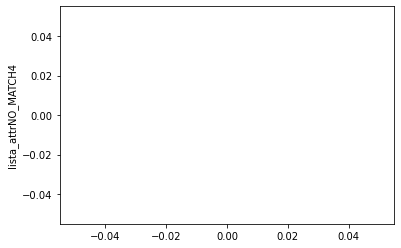

tot_pt: 200
len(random_tuples0) 557
len(result_list_noMatch) 0
len(result_list_match) 557


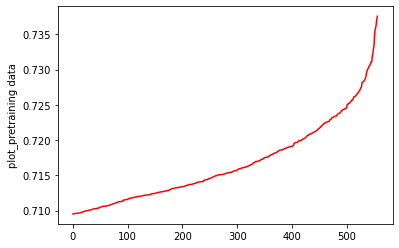

num of non-matches 0
num of matches 556
adding 10 consistency pairs


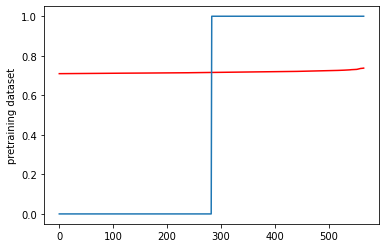

--------------- data augmentation creating dataset --------------
using threshold=0.7095324397087097 to approximate label
discarded 0 elements


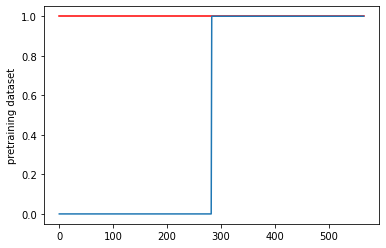

Previous generated dataset size: 0
New generated dataset size: 566


loading configuration file config.json from cache at /Users/tommasoteofili/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.24.0",
  "vocab_size": 30522
}

loading file vocab.txt from cache at /Users/tommasoteofili/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/vocab.txt
loading file tokenizer.json from cache at /Users/tommasoteofili/.cache/huggin

------------- Student Training distilbert-base-uncased -----------------
Training with 592 record pairs (566 generated, 26 GT)
loading adaptive_ft model from models/beers/mlm-distilbert-base-uncased


loading configuration file models/beers/mlm-distilbert-base-uncased/config.json
Model config DistilBertConfig {
  "_name_or_path": "models/beers/mlm-distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.24.0",
  "vocab_size": 30522
}

loading weights file models/beers/mlm-distilbert-base-uncased/pytorch_model.bin
Some weights of the model checkpoint at models/beers/mlm-distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer

Using custom data configuration default-bbf46e6fecbfffd9


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /Users/tommasoteofili/.cache/huggingface/datasets/csv/default-bbf46e6fecbfffd9/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.
Using custom data configuration default-cfb5d3a95d03cfff


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /Users/tommasoteofili/.cache/huggingface/datasets/csv/default-cfb5d3a95d03cfff/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.


  0%|          | 0/592 [00:00<?, ?ex/s]

  0%|          | 0/91 [00:00<?, ?ex/s]

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 592
  Num Epochs = 6
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 222
  Number of trainable parameters = 66955010
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss


***** Running Evaluation *****
  Num examples = 91
  Batch size = 16
Saving model checkpoint to ./models/beers/checkpoint-37
Configuration saved in ./models/beers/checkpoint-37/config.json
Model weights saved in ./models/beers/checkpoint-37/pytorch_model.bin
tokenizer config file saved in ./models/beers/checkpoint-37/tokenizer_config.json
Special tokens file saved in ./models/beers/checkpoint-37/special_tokens_map.json
Deleting older checkpoint [models/beers/checkpoint-16] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 91
  Batch size = 16
Saving model checkpoint to ./models/beers/checkpoint-74
Configuration saved in ./models/beers/checkpoint-74/config.json
Model weights saved in ./models/beers/checkpoint-74/pytorch_model.bin
tokenizer config file saved in ./models/beers/checkpoint-74/tokenizer_config.json
Special tokens file saved in ./models/beers/checkpoint-74/special_tokens_map.json
Deleting older checkpoint [models/beers/checkpoint-80] due to args.sav

Configuration saved in models/beers/best/models/beers/best/config.json
Model weights saved in models/beers/best/models/beers/best/pytorch_model.bin
tokenizer config file saved in models/beers/best/models/beers/best/tokenizer_config.json
Special tokens file saved in models/beers/best/models/beers/best/special_tokens_map.json


<bound method DataFrame.to_string of                 model_type    train   cut    pM   rM   f1M  pNM   rNM  f1NM
0  distilbert-base-uncased  teacher  0.05  0.15  1.0  0.27  0.0  0.00  0.00
1  distilbert-base-uncased  student  0.05  0.15  1.0  0.27  0.0  0.00  0.00
2  distilbert-base-uncased  student  0.05  0.21  1.0  0.35  1.0  0.31  0.48>
Generating dataset
Parsing original dataset
min coseno match:0.2773500981126146
219
40
219
match_tuple: 40
no match_tuple: 219
No_match_with_cos_too_small: 9
match number: 6 no match number: 6


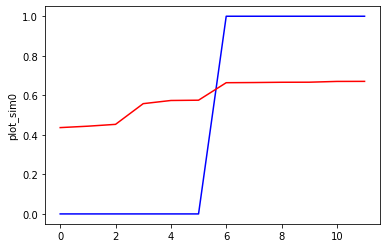

min_sim_Match 0.6637789max_sim_noMatch 0.57529116
!max_sim 0.6637789011001587
!min_sim 0.5
--------------- Generating datasets --------------
min_cos_sim 0.30316953129541624
creating data with theta_min:0.5, theta_max:0.6637789011001587
4345
3000
4345
3000
4345
LSH blocking started
903 pairs found
999 pairs found
1254 pairs found
1280 pairs found
LSH blocking done


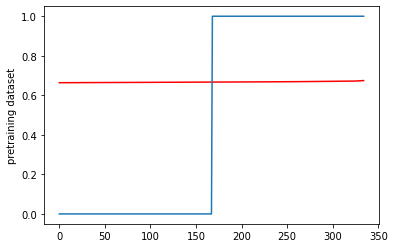

335 positive pairs found via LSH blocking and high similarity check
0 negative pairs found via LSH blocking and low similarity check
max pair visit: 1500
dizionari
listL_match[0]
0


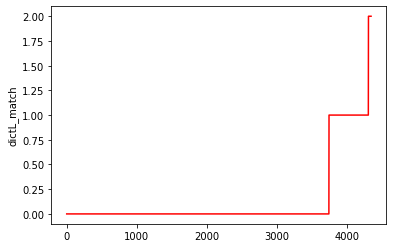

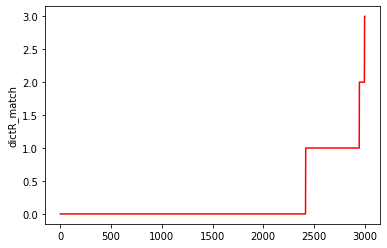

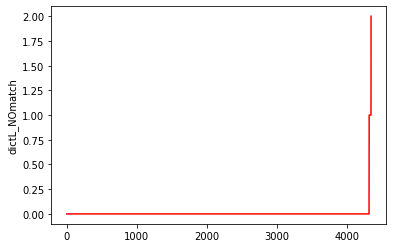

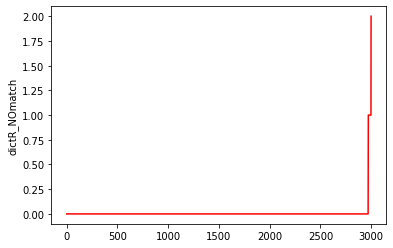

create candidates set
635 matches, 30 non-matches, 11 consistency pairs
dizionari occorrenze degli attributi del dataset di pt


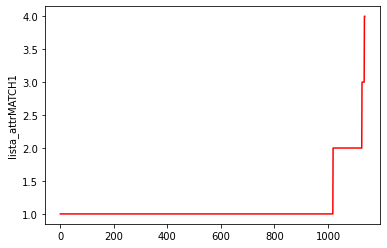

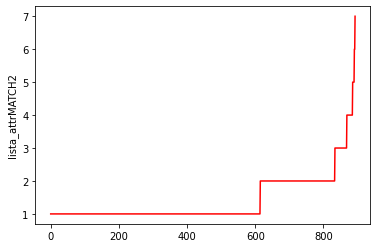

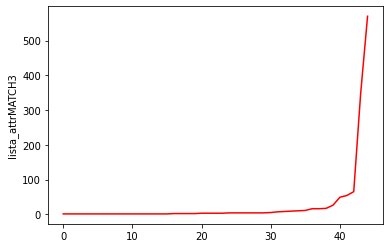

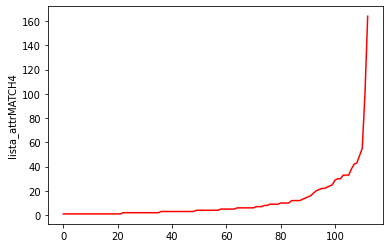

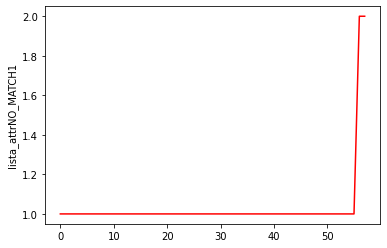

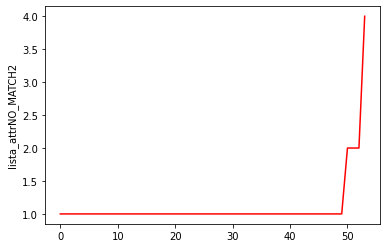

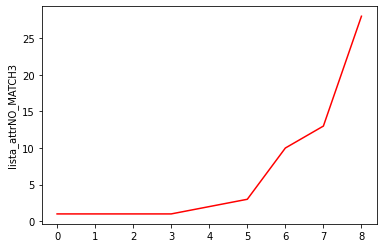

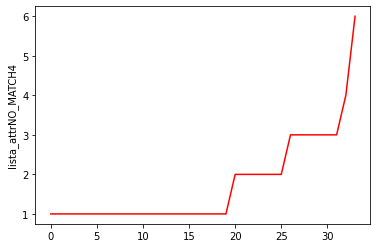

tot_pt: 300
len(random_tuples0) 665
len(result_list_noMatch) 30
len(result_list_match) 635


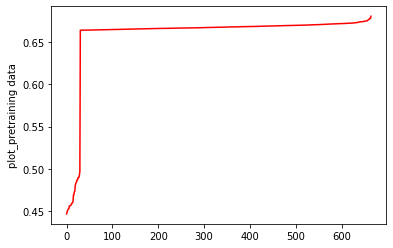

k_slice 150
adding 11 consistency pairs
adding 30 non-matching pairs
adding 30 matching pairs
generated data size 71


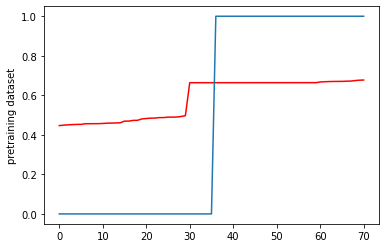

--------------- data augmentation creating dataset --------------
using threshold=0.6637789011001587 to approximate label
discarded 0 elements


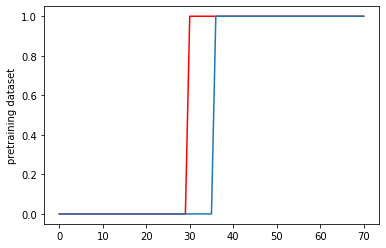

Previous generated dataset size: 0
New generated dataset size: 71


loading configuration file config.json from cache at /Users/tommasoteofili/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.24.0",
  "vocab_size": 30522
}

loading file vocab.txt from cache at /Users/tommasoteofili/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/vocab.txt
loading file tokenizer.json from cache at /Users/tommasoteofili/.cache/huggin

------------- Student Training distilbert-base-uncased -----------------
Training with 97 record pairs (71 generated, 26 GT)
loading adaptive_ft model from models/beers/mlm-distilbert-base-uncased


loading configuration file models/beers/mlm-distilbert-base-uncased/config.json
Model config DistilBertConfig {
  "_name_or_path": "models/beers/mlm-distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.24.0",
  "vocab_size": 30522
}

loading weights file models/beers/mlm-distilbert-base-uncased/pytorch_model.bin
Some weights of the model checkpoint at models/beers/mlm-distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer

Using custom data configuration default-bc927d793cb88cbc


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /Users/tommasoteofili/.cache/huggingface/datasets/csv/default-bc927d793cb88cbc/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.
Using custom data configuration default-6e5b8795458a20b2


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /Users/tommasoteofili/.cache/huggingface/datasets/csv/default-6e5b8795458a20b2/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.


  0%|          | 0/97 [00:00<?, ?ex/s]

  0%|          | 0/91 [00:00<?, ?ex/s]

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 97
  Num Epochs = 7
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 49
  Number of trainable parameters = 66955010
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss


***** Running Evaluation *****
  Num examples = 91
  Batch size = 16
Saving model checkpoint to ./models/beers/checkpoint-7
Configuration saved in ./models/beers/checkpoint-7/config.json
Model weights saved in ./models/beers/checkpoint-7/pytorch_model.bin
tokenizer config file saved in ./models/beers/checkpoint-7/tokenizer_config.json
Special tokens file saved in ./models/beers/checkpoint-7/special_tokens_map.json
Deleting older checkpoint [models/beers/checkpoint-185] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 91
  Batch size = 16
Saving model checkpoint to ./models/beers/checkpoint-14
Configuration saved in ./models/beers/checkpoint-14/config.json
Model weights saved in ./models/beers/checkpoint-14/pytorch_model.bin
tokenizer config file saved in ./models/beers/checkpoint-14/tokenizer_config.json
Special tokens file saved in ./models/beers/checkpoint-14/special_tokens_map.json
Deleting older checkpoint [models/beers/checkpoint-222] due to args.save_t

Configuration saved in models/beers/best/models/beers/best/config.json
Model weights saved in models/beers/best/models/beers/best/pytorch_model.bin
tokenizer config file saved in models/beers/best/models/beers/best/tokenizer_config.json
Special tokens file saved in models/beers/best/models/beers/best/special_tokens_map.json


<bound method DataFrame.to_string of                 model_type    train   cut    pM    rM   f1M   pNM   rNM  f1NM
0  distilbert-base-uncased  teacher  0.05  0.15  1.00  0.27  0.00  0.00  0.00
1  distilbert-base-uncased  student  0.05  0.15  1.00  0.27  0.00  0.00  0.00
2  distilbert-base-uncased  student  0.05  0.21  1.00  0.35  1.00  0.31  0.48
3  distilbert-base-uncased  student  0.05  0.30  0.93  0.46  0.98  0.61  0.75>
                model_type    train   cut    pM    rM   f1M   pNM   rNM  f1NM
0  distilbert-base-uncased  teacher  0.05  0.15  1.00  0.27  0.00  0.00  0.00
1  distilbert-base-uncased  student  0.05  0.15  1.00  0.27  0.00  0.00  0.00
2  distilbert-base-uncased  student  0.05  0.21  1.00  0.35  1.00  0.31  0.48
3  distilbert-base-uncased  student  0.05  0.30  0.93  0.46  0.98  0.61  0.75


In [4]:
results_df = cheaper_train(datasets[5], params)
print(results_df)

In [5]:
mlm_model_name = "./models/beers/mlm-distilbert-base-uncased"
er_model_name = "./models/beers"
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
mlm_model = AutoModelForMaskedLM.from_pretrained(mlm_model_name)
class_model = AutoModelForSequenceClassification.from_pretrained(er_model_name)

loading configuration file config.json from cache at /Users/tommasoteofili/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.24.0",
  "vocab_size": 30522
}

loading file vocab.txt from cache at /Users/tommasoteofili/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/vocab.txt
loading file tokenizer.json from cache at /Users/tommasoteofili/.cache/huggin

In [6]:
text_classification = pipeline('text-classification', model=class_model, tokenizer=tokenizer)
text = 'Zoe Maine Brew Company American Amber / Red Ale 7.20 %  Birrificio Trunasse Zoe ZOE - Birrificio Trunasse Golden Ale/Blond Ale 5.50 %'
text_classification(text)

[{'label': 'LABEL_1', 'score': 0.7532460689544678}]

In [7]:
fill_mask = pipeline('fill-mask', model=mlm_model, tokenizer=tokenizer)
masked_text = 'Zoe Maine [MASK] Company American Amber / Red Ale 7.20 %'
fill_mask(masked_text)

[{'score': 0.9323066473007202,
  'token': 16005,
  'token_str': 'brewing',
  'sequence': 'zoe maine brewing company american amber / red ale 7. 20 %'},
 {'score': 0.0613495372235775,
  'token': 5404,
  'token_str': 'beer',
  'sequence': 'zoe maine beer company american amber / red ale 7. 20 %'},
 {'score': 0.0015998787712305784,
  'token': 12161,
  'token_str': 'brewery',
  'sequence': 'zoe maine brewery company american amber / red ale 7. 20 %'},
 {'score': 0.0011395661858841777,
  'token': 4511,
  'token_str': 'wine',
  'sequence': 'zoe maine wine company american amber / red ale 7. 20 %'},
 {'score': 0.0010176404612138867,
  'token': 15669,
  'token_str': 'ale',
  'sequence': 'zoe maine ale company american amber / red ale 7. 20 %'}]